In [1]:
print('hello world')


hello world


In [2]:
print('hello world')

hello world


In [3]:
#STEP-1 IMPORT ALL LIBRARIES
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4]:
#READING AND LOOKING THE DATA
df = pd.read_csv('Churn.csv')
df

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
#ROWS AND COLUMNS
df.shape


(7044, 21)

In [6]:
#column names
df.columns.values

array(['Customer ID', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection',
       'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn'], dtype=object)

In [7]:
#checking for missing values
df.isna().sum()

Customer ID          0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [8]:
#some other statistics
df.describe()

,Senior Citizen,tenure,Monthly Charges
count,7044.000000,7044.000000,7044.000000
mean,0.162124,32.366695,64.756736
std,0.368590,24.560582,30.090786
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
#customer churn(depletion) count
df['Churn'].value_counts()


No     5175
Yes    1869
Name: Churn, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

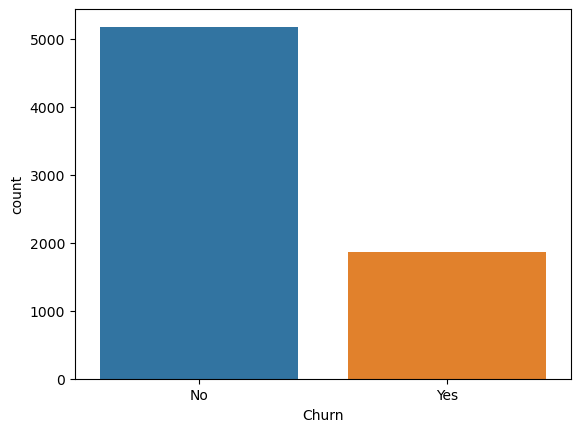

In [10]:
#visualization or graph ploting of churn count
sns.countplot(df['Churn'])


In [11]:
#percentage of customers leaving
numRetained = df[df.Churn == 'No'].shape[0]
numChurned = df[df.Churn == 'Yes'].shape[0]

#print the percentage of customers that stayed
print(numRetained/(numRetained + numChurned)*100, '% of customer that stayed')

#print the percentage of customers that left
print(numChurned/(numRetained + numChurned)*100, '%of customer that left')


73.46678023850085 % of customer that stayed
26.53321976149915 %of customer that left


<AxesSubplot:xlabel='Gender', ylabel='count'>

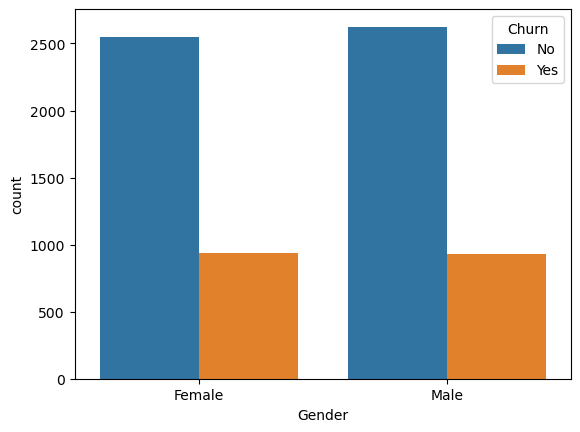

In [12]:
#churn count for males and females
sns.countplot(x='Gender', hue='Churn', data=df)


<AxesSubplot:xlabel='Internet Service', ylabel='count'>

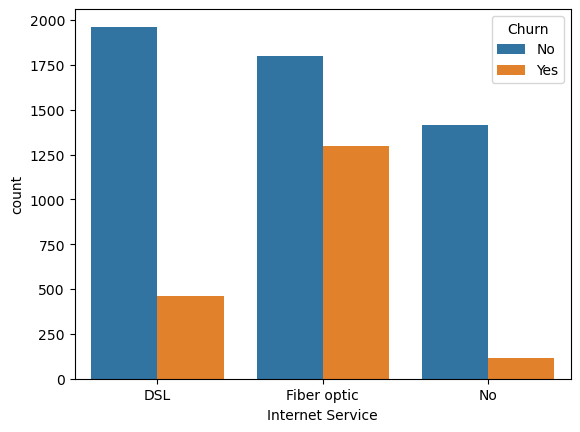

In [13]:
#churn count for Internet Service 
sns.countplot(x='Internet Service', hue='Churn', data=df)


array([<AxesSubplot:title={'center':'tenure'}>,
       <AxesSubplot:title={'center':'Monthly Charges'}>], dtype=object)

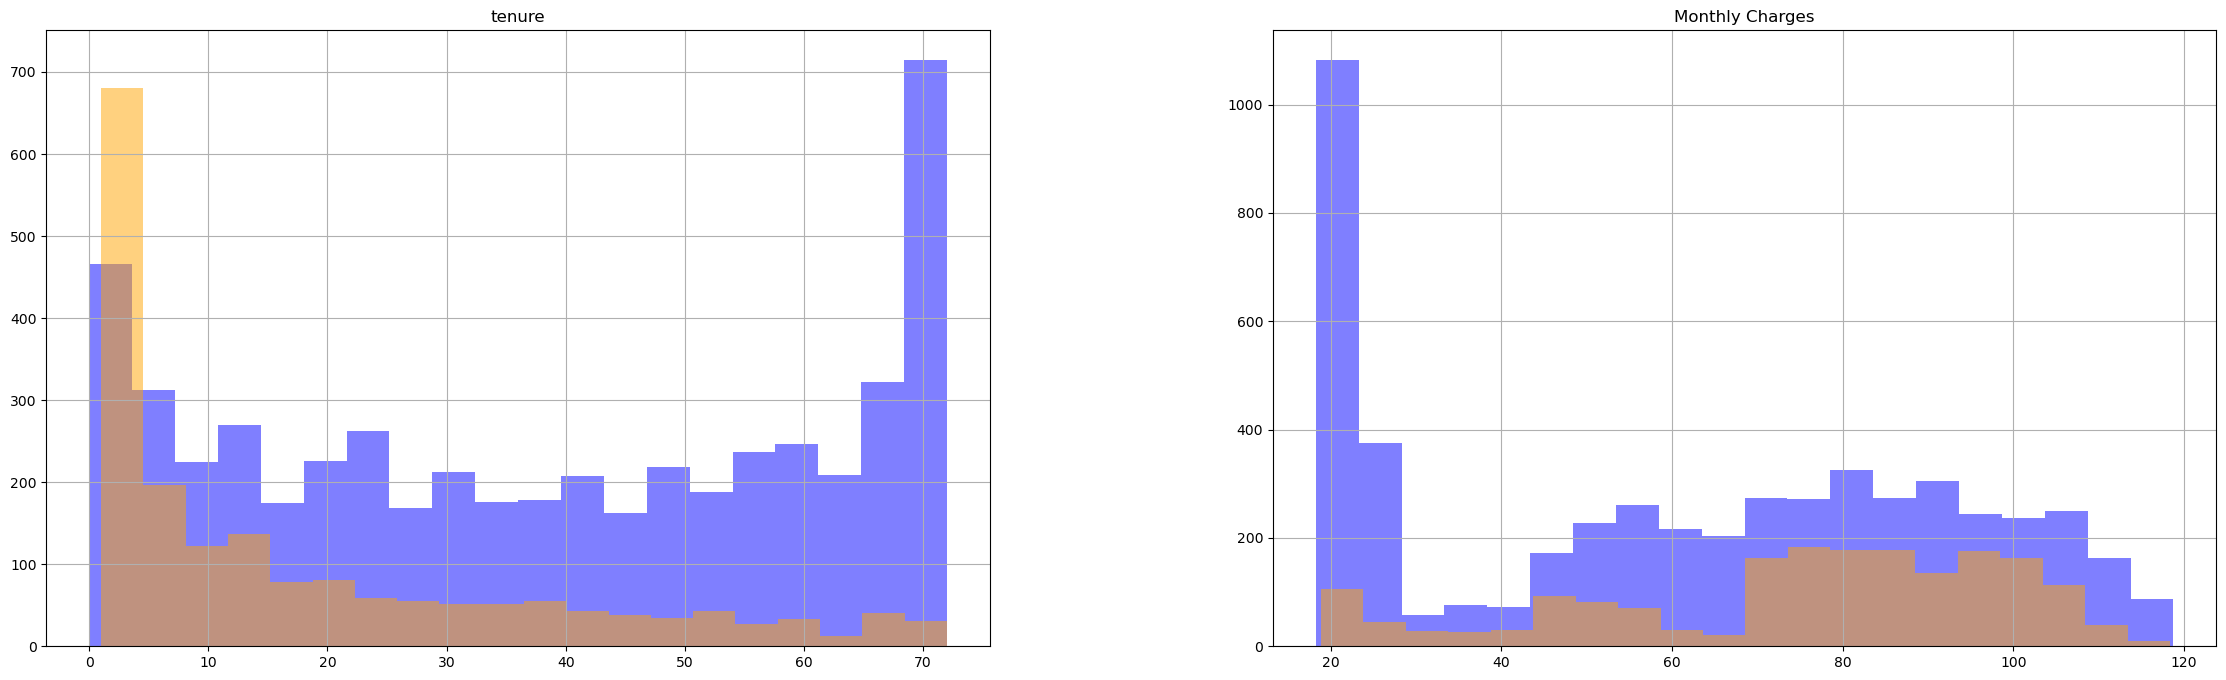

In [14]:
#Visualize numeric data
numericFeatures = ['tenure', 'Monthly Charges']
fig, ax = plt.subplots(1,2, figsize=(28, 8))
df[df.Churn == 'No'][numericFeatures].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numericFeatures].hist(bins=20, color='orange', alpha=0.5, ax=ax)


In [15]:
#removing unnecessary columnns
cleanDF = df.drop('Customer ID', axis=1)


In [16]:
#Convert all the non-numeric columns to numeric
for column in cleanDF.columns:
    if cleanDF[column].dtype == np.float64:
        continue
    cleanDF[column] = LabelEncoder().fit_transform(cleanDF[column])
    

In [17]:
cleanDF.dtypes

Gender                 int32
Senior Citizen         int64
Partner                int32
Dependents             int32
tenure                 int64
Phone Service          int32
Multiple Lines         int32
Internet Service       int32
Online Security        int32
Online Backup          int32
Device Protection      int32
Tech Support           int32
Streaming TV           int32
Streaming Movies       int32
Contract               int32
Paperless Billing      int32
Payment Method         int32
Monthly Charges      float64
Total Charges          int32
Churn                  int32
dtype: object

In [18]:
cleanDF.head()

,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
2,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
3,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
4,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0


In [19]:
#scale the data
x = cleanDF.drop('Churn', axis=1)
y = cleanDF['Churn']
x = StandardScaler().fit_transform(x)


In [20]:
#Split the data into 80% training and 20% testing
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)


In [22]:
#create and train model
model = LogisticRegression()
#train model
model.fit(xtrain, ytrain)


LogisticRegression()

In [23]:
#making my predictions
predictions = model.predict(xtest)
print(predictions)


[0 0 0 ... 1 0 0]


In [24]:
#checking score accuracy
print(classification_report(ytest, predictions))


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1040
           1       0.66      0.53      0.59       369

    accuracy                           0.81      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409

